In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seaborn kütüphanesinden "tips" veri setini yükleyelim
tips = sns.load_dataset("tips")

# Veri setini görüntüleyelim
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [30]:
# ======================1.ADIM: Veri Setini Inceleme===========================
# Örnek Satırların Gözden Geçirilmesi:    Veri setindeki ilk birkaç satır incelenerek verinin genel yapısı hakkında fikir edinilir.
print('\n>>> ilk bes satir verileri : <<<')
print(tips.head())
# Veri Tiplerinin Kontrolü:               Her bir sütunun veri türü kontrol edilir (sayısal, kategorik, tarih gibi).
print('\n>>> veri tipleri : <<<')
print(tips.dtypes)
# Eksik Verilerin İncelenmesi:            Veri setindeki eksik değerlerin bulunup bulunmadığı kontrol edilir.
print('\n>>> Eksik Veriler : <<<')
print(tips.isnull().sum())
# =============================================================================


>>> ilk bes satir verileri : <<<
   total_bill   tip     sex smoker  day    time  size  total_per_person
0       16.99  1.01  Female     No  Sun  Dinner     2          8.495000
1       10.34  1.66    Male     No  Sun  Dinner     3          3.446667
2       21.01  3.50    Male     No  Sun  Dinner     3          7.003333
3       23.68  3.31    Male     No  Sun  Dinner     2         11.840000
4       24.59  3.61  Female     No  Sun  Dinner     4          6.147500

>>> veri tipleri : <<<
total_bill           float64
tip                  float64
sex                 category
smoker              category
day                 category
time                category
size                   int64
total_per_person     float64
dtype: object

>>> Eksik Veriler : <<<
total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
total_per_person    0
dtype: int64


In [33]:
# =====================2. ADIM: Temel İstatistiklerin Hesaplanması=============
# describe() fonksiyonu otomatik olarak numeric sütunlar üzerinde islem yapar.
print('\n>>> Temel Istatistiksel Veriler : <<<')
print(tips.describe())
# Ceyrekler arasi araligin belirlenmesi (%50'lik agirligi ölcer, kutu grafikleri icin gereklidir.)         
sayisal_sutunlar = tips.select_dtypes(include=['float64', 'int64'])
ceyrekler_arasi_aralik = sayisal_sutunlar.quantile(0.75) - sayisal_sutunlar.quantile(0.25)   
print("\n>>> Çeyrekler Arası Aralık: <<<")
print(ceyrekler_arasi_aralik)
# =============================================================================


>>> Temel Istatistiksel Veriler : <<<
       total_bill         tip        size  total_per_person
count  244.000000  244.000000  244.000000         244.00000
mean    19.785943    2.998279    2.569672           7.88823
std      8.902412    1.383638    0.951100           2.91435
min      3.070000    1.000000    1.000000           2.87500
25%     13.347500    2.000000    2.000000           5.80250
50%     17.795000    2.900000    2.000000           7.25500
75%     24.127500    3.562500    3.000000           9.39000
max     50.810000   10.000000    6.000000          20.27500

>>> Çeyrekler Arası Aralık: <<<
total_bill          10.7800
tip                  1.5625
size                 1.0000
total_per_person     3.5875
dtype: float64


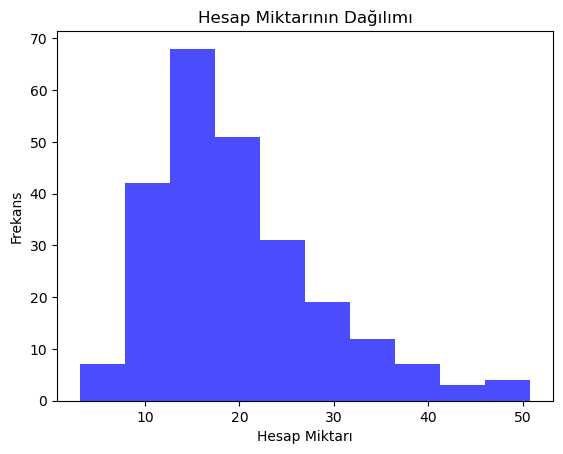

                  total_bill       tip      size  total_per_person
total_bill          1.000000  0.675734  0.598315          0.647497
tip                 0.675734  1.000000  0.489299          0.347393
size                0.598315  0.489299  1.000000         -0.175412
total_per_person    0.647497  0.347393 -0.175412          1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


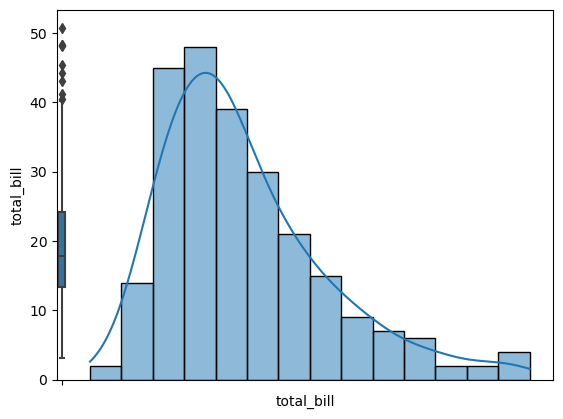

In [27]:
# ====================3.ADIM: Veri Setini Görselleştirme:======================
# Histogramlar: Veri setindeki dağılımları görselleştirmek için histogramlar kullanılır.
plt.hist(tips['total_bill'], bins=10, color='blue', alpha=0.7)
plt.title('Hesap Miktarının Dağılımı')
plt.xlabel('Hesap Miktarı')
plt.ylabel('Frekans')
plt.show()
# Kutu Grafikleri (Box Plots): Veri setindeki aykırı değerleri ve dağılımları görselleştirmek için kutu grafikleri kullanılır.
sns.boxplot(y=tips['total_bill'])    
# Dağılım Grafikleri: Veri setindeki ilişkileri ve dağılımları görselleştirmek için dağılım grafikleri kullanılır.
sns.histplot(tips['total_bill'], kde=True)
# Korelasyon Matrisleri: Veri setindeki sütunlar arasındaki ilişkileri görselleştirmek için korelasyon matrisleri kullanılır.
correlation_matrix = sayisal_sutunlar.corr()
print(correlation_matrix)
# =============================================================================


Eksik Değerlerin Sayısı:
total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
total_per_person    0
dtype: int64


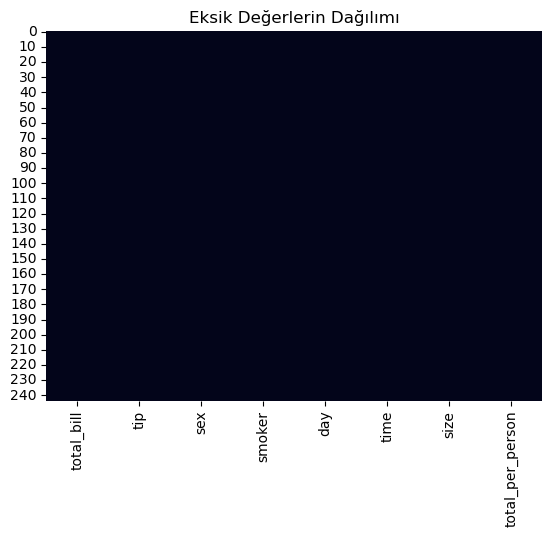

     total_bill   tip     sex smoker   day    time  size  total_per_person
0         16.99  1.01  Female     No   Sun  Dinner     2          8.495000
1         10.34  1.66    Male     No   Sun  Dinner     3          3.446667
2         21.01  3.50    Male     No   Sun  Dinner     3          7.003333
3         23.68  3.31    Male     No   Sun  Dinner     2         11.840000
4         24.59  3.61  Female     No   Sun  Dinner     4          6.147500
..          ...   ...     ...    ...   ...     ...   ...               ...
239       29.03  5.92    Male     No   Sat  Dinner     3          9.676667
240       27.18  2.00  Female    Yes   Sat  Dinner     2         13.590000
241       22.67  2.00    Male    Yes   Sat  Dinner     2         11.335000
242       17.82  1.75    Male     No   Sat  Dinner     2          8.910000
243       18.78  3.00  Female     No  Thur  Dinner     2          9.390000

[244 rows x 8 columns]


In [37]:
# ===================4. ADIM: Eksik Verilerin İncelenmesi ve İşlenmesi=========
# Eksik Verilerin Belirlenmesi: Veri setindeki eksik değerlerin sayısı ve dağılımı incelenir.
eksik_deger_sayisi = tips.isnull().sum()
print("\nEksik Değerlerin Sayısı:")
print(eksik_deger_sayisi)

sns.heatmap(tips.isnull(), cbar=False)
plt.title('Eksik Değerlerin Dağılımı')
plt.show()
# Eksik Verilerin İşlenmesi: Eksik değerler, doldurma, silme veya başka bir yöntemle işlenir.
ortalama_tips = tips.fillna(sayisal_sutunlar.mean())
print(ortalama_tips)
# =============================================================================

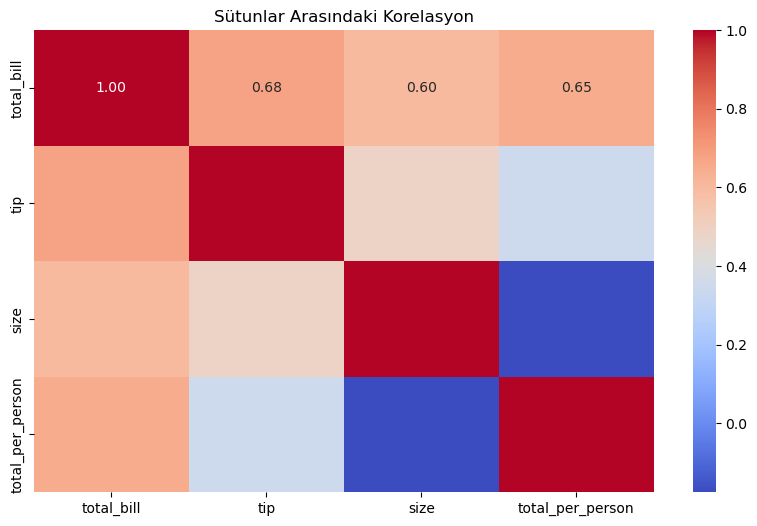

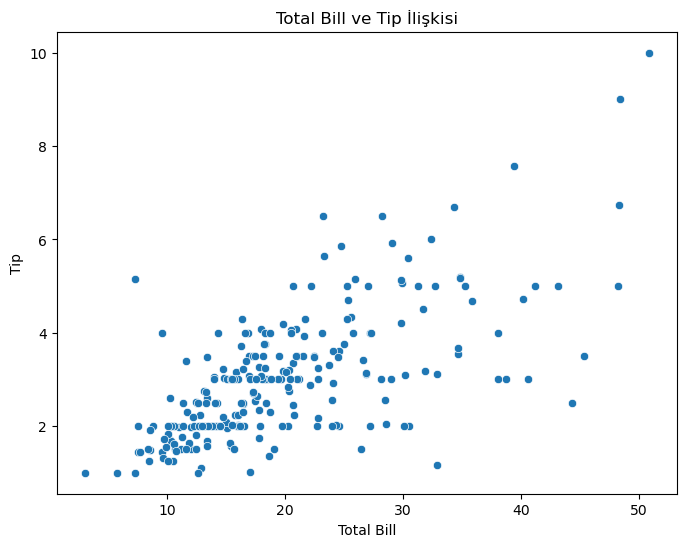

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


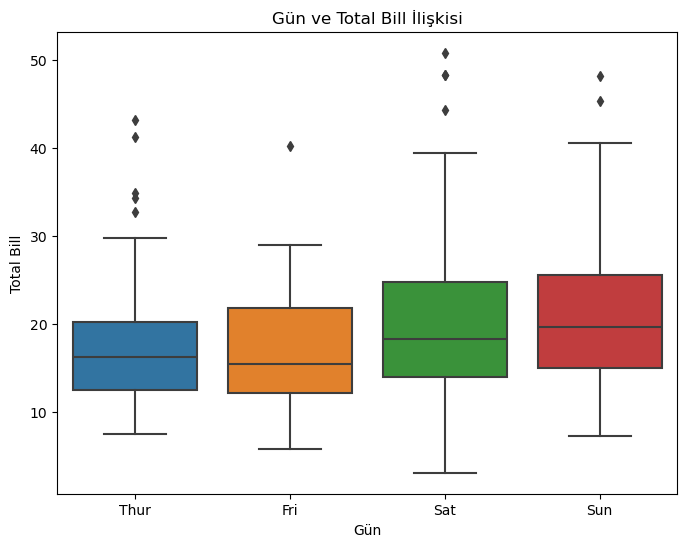

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

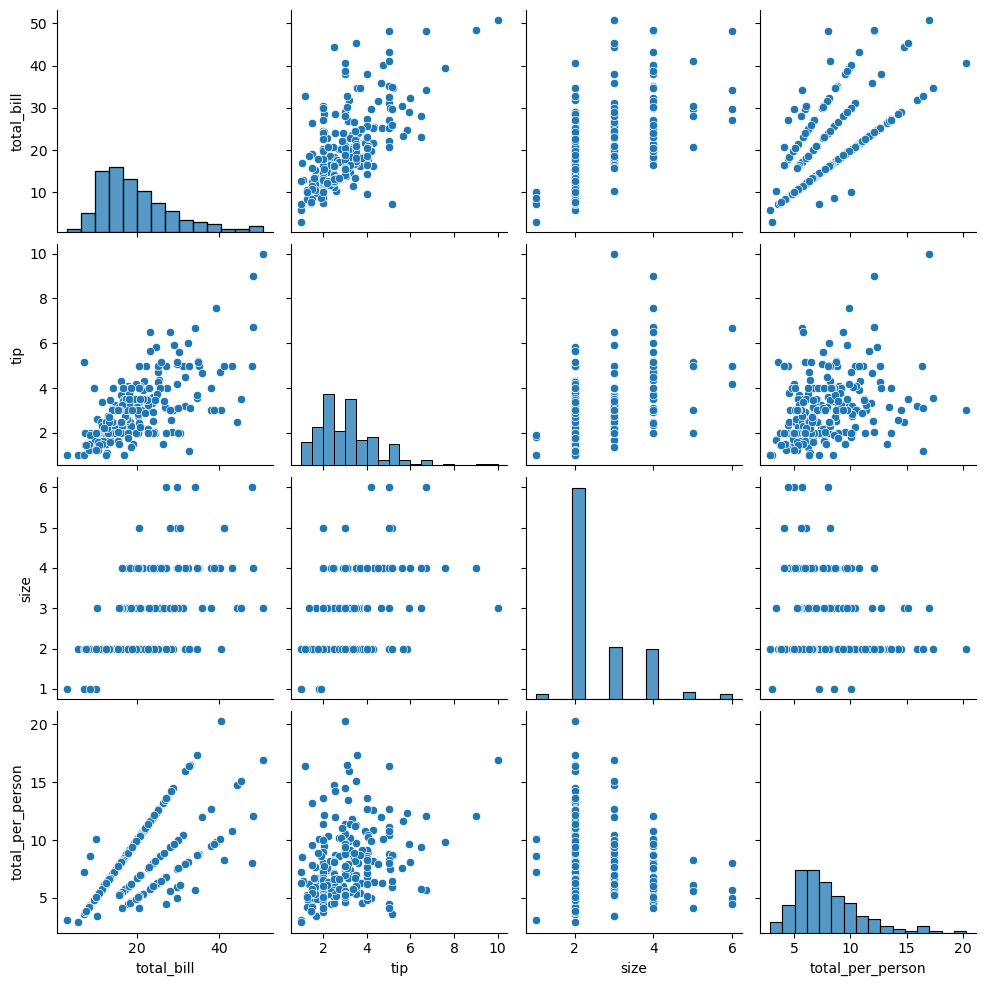

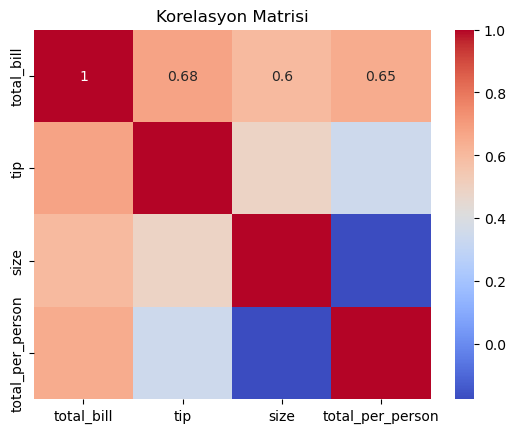

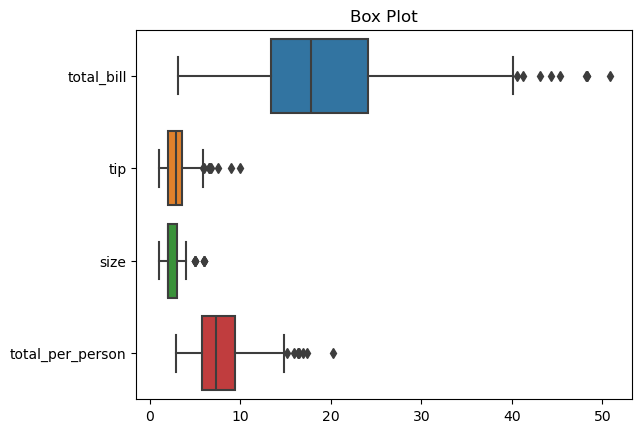

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


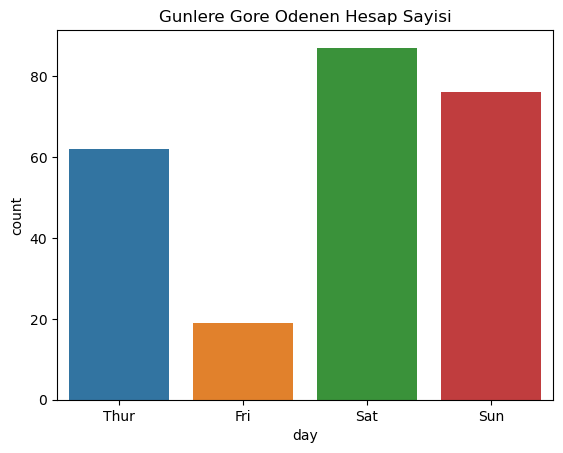

   total_bill   tip     sex smoker  day    time  size  total_per_person
0       16.99  1.01  Female     No  Sun  Dinner     2          8.495000
1       10.34  1.66    Male     No  Sun  Dinner     3          3.446667
2       21.01  3.50    Male     No  Sun  Dinner     3          7.003333
3       23.68  3.31    Male     No  Sun  Dinner     2         11.840000
4       24.59  3.61  Female     No  Sun  Dinner     4          6.147500


In [29]:
# =================5. ADIM: Veri Setinin Anlamlandırılması=====================
# Sütunlar Arasındaki İlişkilerin İncelenmesi: Farklı sütunlar arasındaki ilişkiler ve etkileşimler incelenir.
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sütunlar Arasındaki Korelasyon')
plt.show()          

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)    # -> Bir sayisal sütunun baska bir sayisal sütunla olan iliskisi (total_bill & tip)
plt.title('Total Bill ve Tip İlişkisi')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=tips)      # -> Bir Kategorik sütun ile bir Sayisal sütun arasindaki iliski (day & total_bill)
plt.title('Gün ve Total Bill İlişkisi')
plt.xlabel('Gün')
plt.ylabel('Total Bill')
plt.show()
# Özelliklerin Analizi: Veri setindeki özelliklerin önemi ve etkisi değerlendirilir.

# Özellik Dağılımlarının İncelenmesi
sns.pairplot(tips)
plt.show()

# Özellikler Arasındaki İlişkilerin İncelenmesi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# Anormalliklerin ve Aykırı Değerlerin İncelenmesi
sns.boxplot(data=tips, orient="h")
plt.title("Box Plot")
plt.show()

# Kategorik Özelliklerin İncelenmesi
sns.countplot(x='day', data=tips)
plt.title("Gunlere Gore Odenen Hesap Sayisi")
plt.show()

# Özellik Mühendisliği
tips['total_per_person'] = tips['total_bill'] / tips['size']
print(tips.head())